In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
# Import training data

df = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/new_train.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [4]:
# Import testing data

df_test = pd.read_csv('/content/drive/MyDrive/DS Course Uploads/Datasets/new_test.csv')
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [6]:
df.duplicated().sum()

8

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32942 non-null  int64 
 1   job          32942 non-null  object
 2   marital      32942 non-null  object
 3   education    32942 non-null  object
 4   default      32942 non-null  object
 5   housing      32942 non-null  object
 6   loan         32942 non-null  object
 7   contact      32942 non-null  object
 8   month        32942 non-null  object
 9   day_of_week  32942 non-null  object
 10  duration     32942 non-null  int64 
 11  campaign     32942 non-null  int64 
 12  pdays        32942 non-null  int64 
 13  previous     32942 non-null  int64 
 14  poutcome     32942 non-null  object
 15  y            32942 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.3+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [10]:
df.drop(['pdays','previous'], inplace=True, axis=1)

In [11]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


Since test data has labelencoded output, using labelencoder

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [13]:
# Implement labelencoder

le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
  df[col] = le.fit_transform(df[col])

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,78,5,1,0,0,0,0,0,3,1,1148,1,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,1,0
4,59,5,0,6,0,0,0,0,4,3,368,2,1,0


In [14]:
# Separating input and output

X = df.drop('y', axis=1)
y = df['y']

### Modelling

In [15]:
# Perform train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Fitting the model

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [17]:
# Evaluating the model

print("Accuracy = ", metrics.accuracy_score(y_test, y_pred).round(2))
print("Precision = ", metrics.precision_score(y_test, y_pred).round(2))
print("Recall = ", metrics.recall_score(y_test, y_pred).round(2))
print("F1 score = ", metrics.f1_score(y_test, y_pred).round(2))

Accuracy =  0.89
Precision =  0.63
Recall =  0.23
F1 score =  0.34


In [18]:
# Predict test data

y_test_pred = lr.predict(df_test)
print(list(set(y_test_pred)))
print(list(y_test_pred).count(0))
print(list(y_test_pred).count(1))
df_test['y'] = y_test_pred

# print("Accuracy = ", metrics.accuracy_score(y_test, y_test_pred).round(2))
# print("Precision = ", metrics.precision_score(y_test, y_test_pred).round(2))
# print("Recall = ", metrics.recall_score(y_test, y_test_pred).round(2))
# print("F1 score = ", metrics.f1_score(y_test, y_test_pred).round(2))

[0, 1]
8165
73


In [19]:
s1 = pd.merge(df, df_test, how='inner', on=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'])
s1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y_x,y_y
0,36,1,1,2,0,0,0,0,6,3,151,1,1,0,0
1,27,9,2,5,0,0,0,0,3,1,331,2,1,0,0
2,45,0,1,6,0,0,0,0,3,2,252,1,1,1,0
3,32,9,2,5,0,2,0,0,3,2,128,1,1,0,0


In [21]:
# Comparing common rows in df and df_test to check if output matched
# y_x = df_test predicted value
# y_y = df original value

s2 = pd.merge(df_test, s1, how='inner', on=['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'])
s2

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y,y_x,y_y
0,27,9,2,5,0,0,0,0,3,1,331,2,1,0,0,0
1,36,1,1,2,0,0,0,0,6,3,151,1,1,0,0,0
2,45,0,1,6,0,0,0,0,3,2,252,1,1,0,1,0
3,32,9,2,5,0,2,0,0,3,2,128,1,1,0,0,0


Actual        0    1
Predicted           
0          5709  106
1           596  178


<Axes: xlabel='Actual', ylabel='Predicted'>

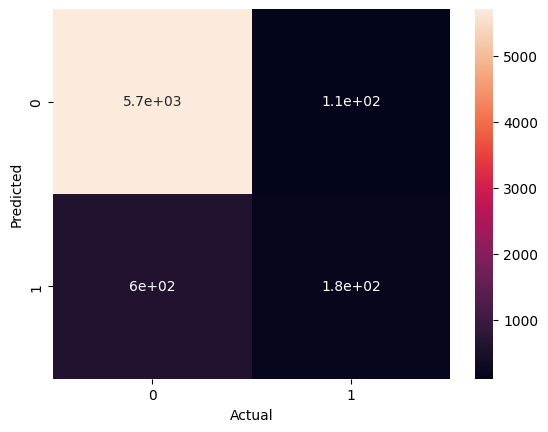

In [23]:
# Create a heatmap

cm = pd.crosstab(y_test, y_pred, rownames=['Predicted'], colnames=['Actual'])
print(cm)

sns.heatmap(cm, annot=True)